<h1 align="center">Ejercicio 1: Regresión Lineal</h1>

In [2]:
import pandas as pd
import numpy as np

In [15]:
set_viviendas = pd.read_csv('DataSet/viviendas.csv')
set_viviendas.head(5)

,Precio $,Superficie (m2),Habitaciones,Garaje
0,41100.00,40,3,Si
1,52000.00,40,3,No
2,54091.09,40,3,No
3,59500.00,40,1,No
4,60000.00,40,1,No


In [9]:
# Verificar valores nulos en el DataFrame
print("Conteo de datos nulos:\n",set_viviendas.isnull().sum())

# Imprimir en consola una muestra de 5 datos del DataFrame
print("Muestra de los datos:\n",set_viviendas.sample(5))

# Describir el DataFrame
print("Descripcion:\n",set_viviendas.describe())

Conteo de datos nulos:
 Precio $           0
Superficie (m2)    0
Habitaciones       0
Garaje             0
dtype: int64
Muestra de los datos:
       Precio $  Superficie (m2)  Habitaciones Garaje
129   43258.00               56             3     No
495  107315.00               80             4     No
550  167081.37               83             3     Si
541   90200.00               83             3     No
227   40600.00               64             3     No
Descripcion:
             Precio $  Superficie (m2)  Habitaciones
count     748.000000       748.000000    748.000000
mean   120086.097473        76.268717      3.054813
std     59172.651833        25.275907      0.502674
min     36294.000000        40.000000      1.000000
25%     79987.500000        60.750000      3.000000
50%    108182.000000        72.000000      3.000000
75%    147248.000000        84.000000      3.000000
max    370000.000000       185.000000      4.000000


In [10]:
set_viviendas.columns.to_list()

['Precio $', 'Superficie (m2)', 'Habitaciones', 'Garaje']

In [112]:
# Remplazar los valore de la columna 'garaje' a 1 si es si y 0 si es no
set_viviendas['Garaje'] = set_viviendas['Garaje'].replace('Si',1)
set_viviendas['Garaje'] = set_viviendas['Garaje'].replace('No',0)
set_viviendas['Garaje'] = set_viviendas['Garaje'].astype(int)

In [93]:
# Separa en conjuntos de caracteristicas y etiquertas (salidas)
# Uso de iloc: df.iloc[#filas_a_tomar,#columnas_a_tomar]
X = set_viviendas.iloc[:,1:].values # Caracteristicas
Y = set_viviendas.iloc[:,0].values # Etiquetas

In [104]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8)

In [105]:
# Crear un modelo de regresion lineal y entrenarlo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [107]:
# Calcular las metricas del modelo
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = model.predict(X_test)
print("Error cuadratico medio: ",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Coeficiente de determinacion: ",r2_score(Y_test,Y_pred))

Error cuadratico medio:  55220.48261590577
Coeficiente de determinacion:  0.21939064142538944


<h1>Predicciones</h1>

In [80]:
# Obtener el orden de los datos a pasar al modelo
columnas = set_viviendas.columns.to_list()[1:]
columnas

['Superficie (m2)', 'Habitaciones', 'Garaje']

In [87]:
# Predecir el valor de una vivienda con 2 habitaciones, superficie de 52 m2 con garaje.
Datos = [
    [52, 2, 1]
]

print("Prediccion: ",model.predict(Datos)[0])

Prediccion:  99071.16732494507


In [88]:
# Predecir el valor de una vivienda con 1 habitaciones, superficie de 60 m2 sin garaje
Datos = [
    [60, 1, 0]
]

print("Prediccion: ",model.predict(Datos)[0])

Prediccion:  100646.35034470678


In [89]:
# Predecir el valor de una vivienda con 3 habitaciones, superficie de 80 m2 sin garaje
Datos = [
    [80, 3, 0]
]

print("Prediccion: ",model.predict(Datos)[0])

Prediccion:  120125.74746025798


<h1>Ejercicio 2: Clasificación</h1>

In [108]:
set_titanic = pd.read_csv('DataSet/titanic.csv')
set_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age
0,892,0,3,"Kelly, Mr. James",male,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0


In [109]:
# Verificar valores nulos en el DataFrame
print("Conteo de datos nulos:\n",set_titanic.isnull().sum())

# Imprimir en consola una muestra de 5 datos del DataFrame
print("Muestra de los datos:\n",set_titanic.sample(5))

# Describir el DataFrame
print("Descripcion:\n",set_titanic.describe())

Conteo de datos nulos:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
dtype: int64
Muestra de los datos:
      PassengerId  Survived  Pclass                                    Name  \
216         1168         0       2            Parker, Mr. Clifford Richard   
331         1307         0       3            Saether, Mr. Simon Sivertsen   
120         1042         1       1   Earnshaw, Mrs. Boulton (Olive Potter)   
226         1183         1       3  Daly, Miss. Margaret Marcella Maggie""   
161         1094         0       1                  Astor, Col. John Jacob   

        Sex   Age  
216    male  28.0  
331    male  38.5  
120  female  23.0  
226  female  30.0  
161    male  47.0  
Descripcion:
        PassengerId    Survived      Pclass         Age
count   332.000000  332.000000  332.000000  332.000000
mean   1100.063253    0.382530    2.144578   30.272590
std     122.763173    0.486739    0.846283   14.181209
min     892.000

In [113]:
# Remplazar los valores de la columna 'Sexo' a 1 si es mujer y 0 si es hombre
set_titanic['Sex'] = set_titanic['Sex'].replace('male', 0)
set_titanic['Sex'] = set_titanic['Sex'].replace('female', 1)
set_titanic['Sex'] = set_titanic['Sex'].astype(int)


In [114]:
# Eliminar las columnas 'PassengerID' y 'Name'
set_titanic = set_titanic.drop(['PassengerId','Name'], axis=1)
set_titanic.head(5)

,Survived,Pclass,Sex,Age
0,0,3,0,34.5
1,1,3,1,47.0
2,0,2,0,62.0
3,0,3,0,27.0
4,1,3,1,22.0


In [115]:
# Separa en conjuntos de caracteristicas y etiquertas (salidas)
# Uso de iloc: df.iloc[#filas_a_tomar,#columnas_a_tomar]
X = set_titanic.iloc[:,1:].values # Caracteristicas
Y = set_titanic.iloc[:,0].values # Etiquetas

In [116]:
# Dividir los datos en conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [117]:
# Construir un modelo de clasificación utilizando el algoritmo de árbol de decisión.
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()

# Entrenar al modelo
modelo.fit(X_train,Y_train)

DecisionTreeClassifier()

<h3>Metricas</h3>

In [118]:
# Realizar prediciiones con los datos de prueba
Y_pred = modelo.predict(X_test)

# Calcular las metricas
from sklearn.metrics import accuracy_score, confusion_matrix
matriz = confusion_matrix(Y_test,Y_pred)
print("Exactitud:",accuracy_score(Y_test,Y_pred))

Exactitud: 1.0


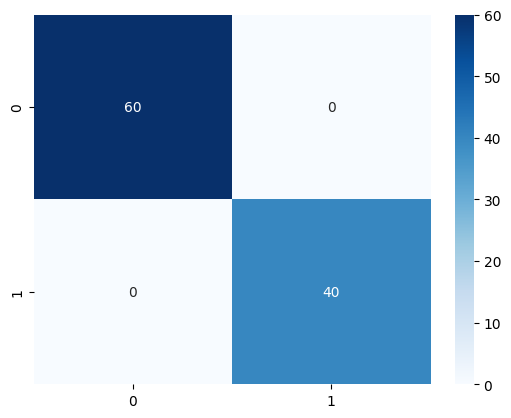

In [119]:
# Mapa de calor de la matriz de comfusión
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matriz,annot=True, fmt="d", cmap="Blues")
plt.show()

In [125]:
# Indique las características del conjunto de datos que tienen mayor y menor importancia
caracteristicas = set_titanic.columns[1:]
importancia = modelo.feature_importances_

for car, imp in zip(caracteristicas, importancia):
    print(f"Caracteristica: {car}, Importancia: {np.round(imp,2)}")

Caracteristica: Pclass, Importancia: 0.0
Caracteristica: Sex, Importancia: 1.0
Caracteristica: Age, Importancia: 0.0


<h3>Predicciones</h3>

In [126]:
caracteristicas.to_list()

['Pclass', 'Sex', 'Age']

In [128]:
# Predecir la supervivencia de un pasajero de 30 años, femenino, en clase 1
Datos = [
    [1, 1, 30]
]

resultado = "sobrevivio" if modelo.predict(Datos)[0] == 1 else "no sobrevivio"
print("Prediccion:",resultado)

Prediccion:  sobrevivio


In [129]:
# Predecir la supervivencia de un pasajero de 10 años, femenino, en clase 2.
Datos = [
    [2, 1, 10]
]

resultado = "sobrevivio" if modelo.predict(Datos)[0] == 1 else "no sobrevivio"
print("Prediccion:",resultado)

Prediccion: sobrevivio


In [130]:
# Predecir la supervivencia de un pasajero de 65 años, masculino, en clase 3
Datos = [
    [3, 0, 65]
]

resultado = "sobrevivio" if modelo.predict(Datos)[0] == 1 else "no sobrevivio"
print("Prediccion:",resultado)

Prediccion: no sobrevivio


<h1>Ejercicio 3: Clustering</h1>

In [131]:
set_mall_costumers = pd.read_csv('DataSet/mall_customers.csv')
set_mall_costumers.head(5)

,CustomerID,Genre,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


In [132]:
# Verificar valores nulos en el DataFrame
print("Conteo de datos nulos:\n",set_mall_costumers.isnull().sum())

# Imprimir en consola una muestra de 5 datos del DataFrame
print("Muestra de los datos:\n",set_mall_costumers.sample(5))

# Describir el DataFrame
print("Descripcion:\n",set_mall_costumers.describe())

Conteo de datos nulos:
 CustomerID                0
Genre                     0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64
Muestra de los datos:
      CustomerID   Genre  Age  Annual Income ($)  Spending Score (1-100)
129         130    Male   38              71000                      75
27           28    Male   35              28000                      61
172         173    Male   36              87000                      10
152         153  Female   44              78000                      20
104         105    Male   49              62000                      56
Descripcion:
        CustomerID         Age  Annual Income ($)  Spending Score (1-100)
count  200.000000  200.000000         200.000000              200.000000
mean   100.500000   38.850000       60560.000000               50.200000
std     57.879185   13.969007       26264.721165               25.823522
min      1.000000   18.000000       15000.000000              

In [133]:
# Eliminar las columnas 'CustomerID'
set_mall_costumers = set_mall_costumers.drop(['CustomerID'], axis=1)
set_mall_costumers.head(5)

,Genre,Age,Annual Income ($),Spending Score (1-100)
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


In [135]:
# Remplazar los valores de la columna Genre a 1 si es mujer y 0 si es hombre
set_mall_costumers['Genre'] = set_mall_costumers['Genre'].replace('Female', 0)
set_mall_costumers['Genre'] = set_mall_costumers['Genre'].replace('Male', 1)
set_mall_costumers['Genre'] = set_mall_costumers['Genre'].astype(int)

In [136]:
# Normalizar los datos
X = set_mall_costumers.values
X = (X - X.mean()) / X.std()

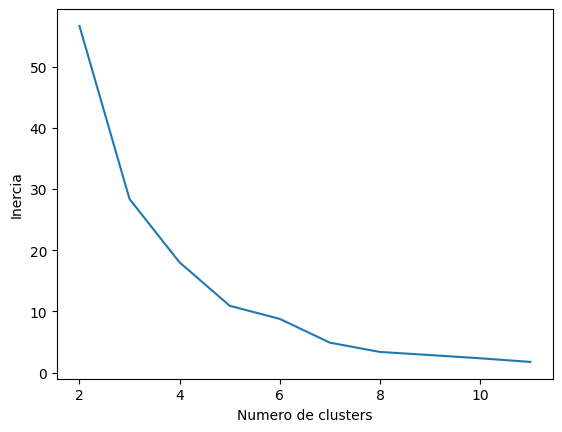

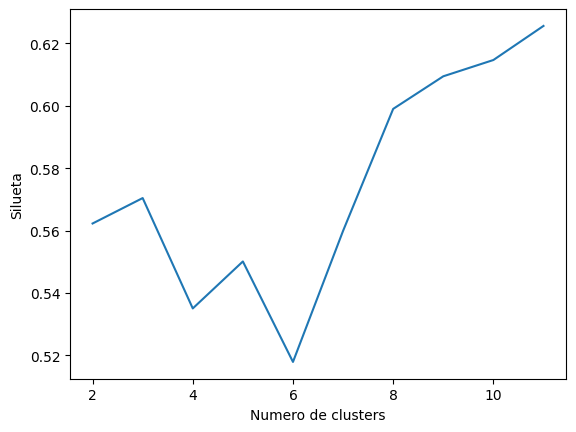

In [138]:
# Curva de codo (Determinar el numero de clusters)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

inercias = []
clusters = np.arange(2, 12, dtype=int)
siluetas = []
for i in clusters:
    modelo = KMeans(n_clusters=i, random_state=100)
    modelo.fit(X)
    inercias.append(modelo.inertia_)
    siluetas.append(silhouette_score(X, modelo.labels_))
plt.plot(clusters, inercias)
plt.xlabel("Numero de clusters")
plt.ylabel("Inercia")
plt.show()
print("\n"*2)
plt.plot(clusters, siluetas)
plt.xlabel("Numero de clusters")
plt.ylabel("Silueta")
plt.show()

In [139]:
# Crear el modelo
modelo = KMeans(n_clusters=5, random_state=100)
modelo.fit(X)
centroides = modelo.cluster_centers_
etiquetas = modelo.labels_ # Salidas
print(centroides, etiquetas)

silueta = silhouette_score(X, etiquetas)
print(silueta)

# Metricas de evaluacion
print("La silueta es:", silueta)
print("La inercia es:", modelo.inertia_)

[[-0.51744436 -0.51609993  1.63983847 -0.51577002]
 [-0.5174482  -0.51599289  0.92403837 -0.51573124]
 [-0.51744333 -0.51621472  3.71440295 -0.51576679]
 [-0.51744464 -0.51619766  2.41622899 -0.51571658]
 [-0.51744546 -0.51626911  0.23335407 -0.51576572]] [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2]
0.5501008683970116
La silueta es: 0.5501008683970116
La inercia es: 10.930556051098321


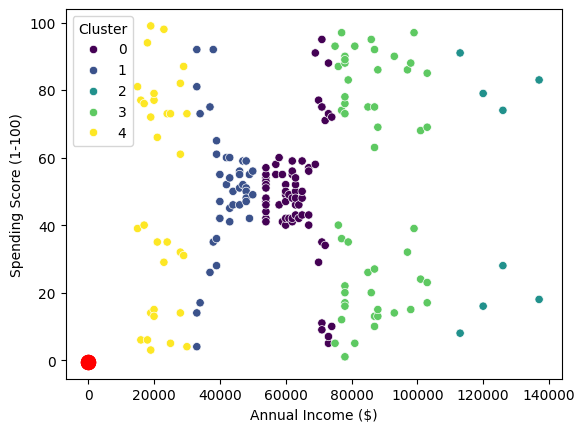

In [146]:
# patrones en los clusters obtenidos
set_mall_costumers['Cluster'] = etiquetas
set_mall_costumers.head(5)

# Visualizar los clusters
import seaborn as sns
sns.scatterplot(data=set_mall_costumers, x="Annual Income ($)", y="Spending Score (1-100)", hue="Cluster", palette="viridis")
plt.scatter(centroides[:,0], centroides[:,1], c='red', s=100)
plt.show()

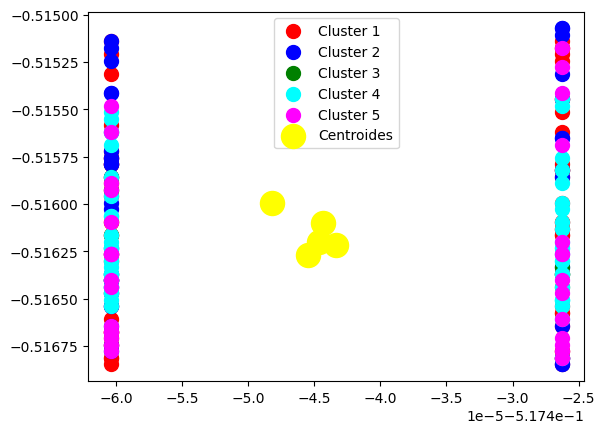

In [142]:
# Graficar los clusters
plt.scatter(X[etiquetas == 0, 0], X[etiquetas == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[etiquetas == 1, 0], X[etiquetas == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[etiquetas == 2, 0], X[etiquetas == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[etiquetas == 3, 0], X[etiquetas == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[etiquetas == 4, 0], X[etiquetas == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(centroides[:,0], centroides[:,1], s=300, c='yellow', label='Centroides')
plt.legend()
plt.show()

<h3>Predicciones</h3>

In [140]:
set_mall_costumers.columns.to_list()

['Genre', 'Age', 'Annual Income ($)', 'Spending Score (1-100)']

In [141]:
# Asignar un nuevo cliente femenino de 40 años, con un ingreso anual de 70000 y un puntaje de gasto de 50
Datos = [
    [0, 40, 70000, 50]
]

print("Cluster:",modelo.predict(Datos)[0])

Cluster: 2


In [143]:
# Asignar un nuevo cliente masculino de 80 años, con un ingreso anual de 80000 y un puntaje de gasto de 70.
Datos = [
    [1, 80, 80000, 70]
]

print("Cluster:",modelo.predict(Datos)[0])

Cluster: 2


In [144]:
# Asignar un nuevo cliente femenino de 20 años, con un ingreso anual de 60000 y un puntaje de gasto de 10.
Datos = [
    [0, 20, 60000, 10]
]

print("Cluster:",modelo.predict(Datos)[0])

Cluster: 2
